# Instructions
## Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

## As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

## To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [8]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
#Load CSV Files
clinical_data= pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_drug_data= pd.read_csv("raw_data/mouse_drug_data.csv")

#See what's in both data sets 
#clinical_data.head()
#mouse_drug_data.head()

In [10]:
# Merge our two data frames together
combined_data = pd.merge(clinical_data, mouse_drug_data, on = "Mouse ID")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [11]:
#drug_count= combined_data["Drug"].value_counts()
#drug_count = 
drug= combined_data["Drug"].unique()
drug

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'], dtype=object)

In [12]:
#create pivot table with selected data , get mean of Tumor Volume per timepoint per Drug
Tumor_data= combined_data.pivot_table(values=["Tumor Volume (mm3)"], index=["Drug", "Timepoint"], aggfunc=np.mean)
Tumor_data.round(3)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                      45.000
          5                      44.266
          10                     43.084
          15                     42.064
          20                     40.716
          25                     39.940
          30                     38.769
          35                     37.817
          40                     36.958
          45                     36.236
Ceftamin  0                      45.000
          5                      46.503
          10                     48.285
          15                     50.094
          20                     52.157
          25                     54.288
          30                     56.770
          35                     58.828
          40                     61.468
          45                     64.132
Infubinol 0                      45.000
          5                      47.062
          10                     49.404
          15                     51.296
          20                     53.198
          25                     55.715
          30                     58.299
          35                     60.742
          40                     63.163
          45                     65.756
...                                 ...
Ramicane  0                      45.000
          5                      43.945
          10                     42.532
          15                     41.495
          20                     40.238
          25                     38.974
          30                     38.703
          35                     37.452
          40                     36.574
          45                     34.956
Stelasyn  0                      45.000
          5                      47.527
          10                     49.464
          15                     51.529
          20                     54.067
          25                     56.166
          30                     59.827
          35                     62.441
          40                     65.356
          45                     68.438
Zoniferol 0                      45.000
          5                      46.852
          10                     48.690
          15                     50.779
          20                     53.170
          25                     55.433
          30                     57.714
          35                     60.089
          40                     62.917
          45                     65.961

[100 rows x 1 columns]

In [13]:
Tumor_data2= pd.pivot_table(combined_data, index=["Timepoint"],values=["Tumor Volume (mm3)"],columns=["Drug"], aggfunc=[np.mean])
Tumor_data2

mean                                              \
          Tumor Volume (mm3)                                               
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [14]:
#Analyze the data to show how four treatments compare
#4 Treatemnts = Capomulin, Infubinol, Ketapril, and Placebo 
TData_Capomulin= Tumor_data.loc["Capomulin"]
#TData_Capomulin



TData_Infubinol= Tumor_data.loc["Infubinol"]
#TData_Infubinol

TData_Ketapril= Tumor_data.loc["Ketapril"]
#TData_Ketapril

TData_Placebo= Tumor_data.loc["Placebo"]
#pd.DataFrame= TData_Placebo
#TData_Placebo



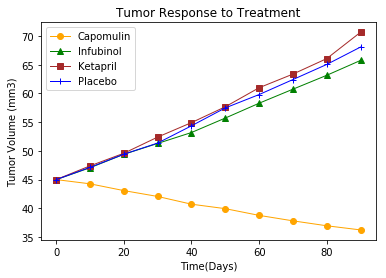

In [15]:
#Treatment Graphs
#x_axis= [0,5,10,15,20,25,30,35,40,45]
x_axis= [0,10,20,30,40,50,60,70,80,90]
TData_Capomulin, = plt.plot(x_axis, TData_Capomulin, marker="o",color="orange", linewidth=1, label="Capomulin")
TData_Infubinol, = plt.plot(x_axis, TData_Infubinol, marker="^",color="green", linewidth=1, label="Infubinol")
TData_Ketapril, = plt.plot(x_axis, TData_Ketapril, marker="s",color="brown", linewidth=1, label="Ketapril")
TData_Placebo, = plt.plot(x_axis, TData_Placebo, marker="+",color="blue", linewidth=1, label="Placebo")

plt.legend(handles=[TData_Capomulin, TData_Infubinol, TData_Ketapril, TData_Placebo,], loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Metastatic Response to Treatment

In [16]:
#create pivot table with selected data , get mean of Metastatic Site per timepoint per Drug
MS_data= combined_data.pivot_table(values=["Metastatic Sites"], index=["Drug", "Timepoint"], aggfunc=np.mean)
MS_data


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [17]:
MS_data2= pd.pivot_table(combined_data, index=["Timepoint"],values=["Metastatic Sites"],columns=["Drug"], aggfunc=[np.mean])
MS_data2


mean                                                    \
          Metastatic Sites                                                     
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [18]:
#Analyze the data to show how four treatments compare
#4 Treatemnts = Capomulin, Infubinol, Ketapril, and Placebo 
MSData_Capomulin= MS_data.loc["Capomulin"]
#MSData_Capomulin



MSData_Infubinol= MS_data.loc["Infubinol"]
#MSData_Infubinol

MSData_Ketapril= MS_data.loc["Ketapril"]
#MSData_Ketapril

MSData_Placebo= MS_data.loc["Placebo"]
#MSData_Placebo


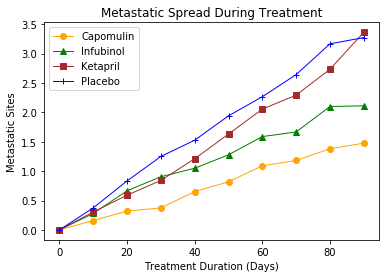

In [19]:
#Metastatic Site Graphs
x_axis= [0,10,20,30,40,50,60,70,80,90]
MSData_Capomulin, = plt.plot(x_axis, MSData_Capomulin, marker="o",color="orange", linewidth=1, label="Capomulin")
MSData_Infubinol, = plt.plot(x_axis, MSData_Infubinol, marker="^",color="green", linewidth=1, label="Infubinol")
MSData_Ketapril, = plt.plot(x_axis, MSData_Ketapril, marker="s",color="brown", linewidth=1, label="Ketapril")
MSData_Placebo, = plt.plot(x_axis, MSData_Placebo, marker="+",color="blue", linewidth=1, label="Placebo")

plt.legend(handles=[MSData_Capomulin, MSData_Infubinol, MSData_Ketapril, MSData_Placebo,], loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.show()

## Survival Rates 

In [4]:
#create pivot table with selected data , get mean of Mouse Count per timepoint per Drug
S_data= combined_data.pivot_table(values=["Mouse ID"], index=["Drug", "Timepoint"],aggfunc='count')
S_data

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [5]:
S_data2= pd.pivot_table(combined_data, index=["Timepoint"],values=["Mouse ID"],columns=["Drug"], aggfunc='count')
S_data2

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [6]:
#Analyze the data to show how four treatments compare
#4 Treatemnts = Capomulin, Infubinol, Ketapril, and Placebo 
SData_Capomulin= S_data.loc["Capomulin"]
#MSData_Capomulin



SData_Infubinol= S_data.loc["Infubinol"]
#MSData_Infubinol

SData_Ketapril= S_data.loc["Ketapril"]
#MSData_Ketapril

SData_Placebo= S_data.loc["Placebo"]
#MSData_Placebo

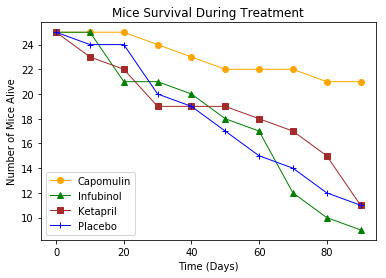

In [7]:
#Mouse Survival Graphs
x_axis= [0,10,20,30,40,50,60,70,80,90]
SData_Capomulin, = plt.plot(x_axis, SData_Capomulin, marker="o",color="orange", linewidth=1, label="Capomulin")
SData_Infubinol, = plt.plot(x_axis, SData_Infubinol, marker="^",color="green", linewidth=1, label="Infubinol")
SData_Ketapril, = plt.plot(x_axis, SData_Ketapril, marker="s",color="brown", linewidth=1, label="Ketapril")
SData_Placebo, = plt.plot(x_axis, SData_Placebo, marker="+",color="blue", linewidth=1, label="Placebo")

plt.legend(handles=[SData_Capomulin, SData_Infubinol, SData_Ketapril, SData_Placebo,], loc="best")
plt.title("Mice Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Mice Alive")
plt.show()

## Summary Bar Graph